In [ ]:
""" 
manifold for strokes.
clustering
analysis of changes in cluster memebrship with learning.

EXTRACTED FROM devo_strokemanifold... to here just focus on analysis.

Focus on cleaner general-purpose analyses.
"""


In [2]:
%cd ..

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.strok import *
from analysis.line2 import *
from analysis.probedatTaskmodel import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [3]:
from analysis.strok import *
from pythonlib.tools.plottools import plotScatterOverlay

#### PLOTTING CODE

In [4]:
# PARAMS
plotGrid=True


### (old code) wrapper for all plots, just give it paths.

In [ ]:
# === Load
# SDIR = "/data2/analyses/database/clustering/bysimilarity/arc2_lines5/Red-210316_012248"
# SDIR = "/data2/analyses/database/clustering/bysimilarity/arc2_lines5/Pancho-210316_013419"
# SDIR = "/data2/analyses/database/clustering/bysimilarity/arc2_lines5_shapes3/Red-210316_001517"
# SDIR = "/data2/analyses/database/clustering/bysimilarity/arc2_lines5/Red-210316_024118"

# SDIRLIST = [
#     "/data2/analyses/database/clustering/bysimilarity/arc2_lines5/Red-210316_024118",
#     "/data2/analyses/database/clustering/bysimilarity"/arc2_lines5/Pancho-210316_025556"
#     ]

# exptlist = ["arc2", "lines5", "figures89"]
# exptlist = ["lines5", "figures9", "shapes3", "arc2"]
exptlist = []
animallist = ["Red", "Pancho"]
distancelist = ["euclidian_diffs", "euclidian", "hausdorff_means"]
SDIRMAIN = "/data2/analyses/database/clustering/bysimilarity"
strokesver_list = ["beh", "parse"]
strokesver_list = [""]
rescale = "stretch_to_1"
suffix = "-combined_parse_beh"
overwrite = False
dry_run=True

SDIRlist=[]
import glob
for anim in animallist:
    for distver in distancelist:
        for sver in strokesver_list:
            if sver:
                sverthis = f"-strokes_{sver}"
            else:
                sverthis = ""
            f = f"{SDIRMAIN}/*{'*'.join(exptlist)}*-rescale_{rescale}-dist_{distver}{sverthis}{suffix}/{anim}*"
#             print(f)
            dirlist = glob.glob(f)
            
            for d in dirlist:

                SDIR = d
                print(SDIR)
                SDIRlist.append(SDIR)
                
            if not dry_run:                
                plots(SDIR, overwrite, gmm_n=14, plotGrid=True)

## (new + old) new way of loading dirs, but old way of wrapper, all plots


In [14]:
from pythonlib.tools.expttools import findPath
dry_run=False
overwrite = True
plotGrid = False

path_base = "/data2/analyses/database/clustering/bysimilarity"

# Inidiv params
indiv=True
strokes_ver = "strokes_beh_splines"
list_animal = ["Pancho"]
# strokes_ver = "strokes_parse"
for animal in list_animal:
#     animal = "Red"

    path_fname = "SAVEDAT"
    ext = ".pkl"


    # Load paths for indiv data
    if indiv:
        path_hierarchy = [
            ["indiv"],
            ["rescale", "stretch_to_1", "euclidian_diffs", strokes_ver],
            [animal],
        ]
    else:
        # Load paths for combined data
        assert False, "what is this bullshit"
        path_hierarchy = [
            ["combined"],
            ["Red", "Pancho"],
            ["Pancho", "Red"],
        ]

    SDIRlist = findPath(path_base, path_hierarchy, path_fname, ext, 
                        return_without_fname=True)


    if not dry_run:      
        for SDIR in SDIRlist:
            plots(SDIR, overwrite, gmm_n=14, plotGrid=plotGrid);
            plt.close("all")


Searching using this string:
/data2/analyses/database/clustering/bysimilarity/*indiv*/*rescale*stretch_to_1*euclidian_diffs*strokes_beh_splines*/*Pancho*/*SAVEDAT*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/clustering/bysimilarity/indiv/rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh_splines/Pancho-210403_180027
** Plotting this dir: /data2/analyses/database/clustering/bysimilarity/indiv/rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh_splines/Pancho-210403_180027
{'animallist': ['Pancho'], 'exptlist': ['arc2', 'figures9', 'lines5', 'shapes3', 'shapes3v2'], 'params': {'rescale_strokes_ver': 'stretch_to_1', 'distancever': 'euclidian_diffs'}}
dict_keys(['animallist', 'exptlist', 'params'])


KeyError: 'tsne_models'

## (new code) Loading pre-computed data

In [ ]:
from pythonlib.tools.expttools import findPath
# Load paths for indiv data
path_base = "/data2/analyses/database/clustering/bysimilarity/indiv"
path_fname = "SAVEDAT"
ext = ".pkl"

path_hierarchy = [
    ["stretch_to_1", "dist_euclidian_diffs", "strokes_beh_splines"],
    [""]]
SDIRlist1 = findPath(path_base, path_hierarchy, path_fname, ext, return_without_fname=True)

path_hierarchy = [
    ["stretch_to_1", "dist_euclidian_diffs", "strokes_parse"],
    [""]]
SDIRlist2 = findPath(path_base, path_hierarchy, path_fname, ext, return_without_fname=True)

SDIR_list = SDIRlist1
SDIR_list.extend(SDIRlist2)
print("=== GETTING THESE SF indivs")
print(len(SDIR_list))
[print(s) for s in SDIR_list]

# Load multiple presaved SF, and concatnate.
import pickle
SFall =[]
print("LOADING SF:")
for SDIR in SDIR_list:
    path = f"{SDIR}/SF.pkl"
    with open(path, "rb") as f:
        SF = pickle.load(f)

    # add column to map back to original dataset
    SF["path_to_sf"] = path

    if "Dataset" in SF.columns:
        del SF["Dataset"]
    print("---")
    print(path)
    print("extracted SF, length")
    print(len(SF))
    SFall.append(SF)


In [ ]:
import pandas as pd
# SF = SFall[0]
SF = pd.concat(SFall)
SF = SF.reset_index(drop=True)


In [ ]:
plt.figure()
plt.hist([s.shape[1] for s in SF["strok"].values])

###  GOOD - load coimbined data (single dataset, already done combinngi)

In [ ]:
from pythonlib.tools.expttools import findPath

# Load paths for combined data
# path_base = "/data2/analyses/database/clustering/bysimilarity"
# path_hierarchy = [
#     ["combined"],
#     ["Red", "Pancho", "parse_vs_behsplines"],
#     ["Pancho", "Red"],
# ]
path_base = "/data2/analyses/database/clustering/bysimilarity"
path_hierarchy = [
    ["combined"],
    ["Red", "Pancho", "parse_vs_behsplines"],
    ["Pancho", "Red"],
]
path_fname = "SAVEDAT"
ext = ".pkl"
SDIRlist = findPath(path_base, path_hierarchy, path_fname, ext, return_without_fname=True)

# === Load data

SF, SAVEDAT = loadSF(SDIRlist[0])


# === print summary
print("=== SUMMARIZING")
keys_to_skip = ["similarity_matrix", 'Xpca', 'tsne_models', 'gmm_models', 'pca_model']
for k, v in SAVEDAT.items():
    if k not in keys_to_skip:
        print("--")
        print(k)
        print(v)
        
nbase = SAVEDAT["similarity_matrix"].shape
print("-- Shape of similarity matrix:")
print(nbase)
        

# Assign parse status - for each row True or False.

from pythonlib.tools.pandastools import applyFunctionToAllRows

# HACK, to tell whether is parse or real, 
if "path_to_sf" not in SF.columns:
    print("ARE YOU SURE - THIS ONLY WORKS IF PARSES HAVE TIMES WITH diffs of 1 (0, 1, 2....)")
    def F(x):
        """ returns true is this is parse, bsaed on time intervals being 1
        """
        return np.all(np.isclose(np.unique(np.diff(x["strok"][:,2])), 1.))

else:
    # Note, use set(SF["path_to_sf"]) to find the paths.
    
    print("USING BETTER OPTION, based on ground truth path name")
    # Map from path of original dataset --> whether is parse or beh
    map_path_to_parse = {
       "/data2/analyses/database/clustering/bysimilarity/lines5_arc2_figures8_figures9_shapes3-rescale_stretch_to_1-dist_euclidian_diffs-strokes_parse/Red-210402_015236/SF.pkl":True,
        '/data2/analyses/database/clustering/bysimilarity/lines5_arc2_figures9_shapes3v2_shapes3-rescale_stretch_to_1-dist_euclidian_diffs-strokes_parse/Pancho-210402_015304/SF.pkl':True,
        '/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3_arc2_figures8-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Red-210401_214709/SF.pkl':False,
        '/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3v2_shapes3_arc2-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Pancho-210401_214315/SF.pkl':False,
        '/data2/analyses/database/clustering/bysimilarity/indiv/lines5_arc2_figures8_figures9_shapes3-rescale_stretch_to_1-dist_euclidian_diffs-strokes_parse/Red-210402_015236/SF.pkl':True,
        '/data2/analyses/database/clustering/bysimilarity/indiv/lines5_arc2_figures9_shapes3v2_shapes3-rescale_stretch_to_1-dist_euclidian_diffs-strokes_parse/Pancho-210402_015304/SF.pkl':True,
        '/data2/analyses/database/clustering/bysimilarity/indiv/rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh_splines/Pancho-210403_180027/SF.pkl':False,
        '/data2/analyses/database/clustering/bysimilarity/indiv/rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh_splines/Red-210403_180040/SF.pkl':False   
    }
    def F(x):
        return map_path_to_parse[x["path_to_sf"]]

SF = applyFunctionToAllRows(SF, F, newcolname="is_parse")


# Dataset codes - have a field <animal>_<isparse>
def F(x):
    if x["is_parse"]:
        tmp = "parse"
    else:
        tmp = "beh"        
    return f"{x['animal']}_{tmp}"
    
SF = applyFunctionToAllRows(SF, F, newcolname="animal_dset")


# Summarize assignment to datasets. make sure it is staircase like
plt.figure()
plt.plot(SF["animal_dset"])
print("Dataset -- Trial count")
SF["animal_dset"].value_counts()

# == filtering SF to get only same tasks
from analysis.strok import prepSF, get_SF_shared_tasks

SF = prepSF(SF, SAVEDAT, perp=45)

# get common tasks.
SF_sharedtasks = get_SF_shared_tasks(SF)

# == plot example trials

# 1) Go back and reload dataset




### TSNE PLOTS, but recolor different ways

In [ ]:
from analysis.strok import plotTsneSeparateLabels
plotTsneSeparateLabels(SF_sharedtasks, SAVEDAT)

plotTsneSeparateLabelsHeatmap(SF, 40)

from analysis.strok import gmm_labels, gmm_extract_model
gmm_n = 14
mod = gmm_extract_model(SAVEDAT, gmm_n)
labels_gmm, SF = gmm_labels(SAVEDAT, gmm_n, SF)


SF = gmm_labels_resort(SF)

# == plot
import seaborn as sns
# plt.figure(figsize=(15,5))
fig = sns.displot(data=SF, x="label_resorted",hue="animal_dset", stat="probability", multiple="dodge", 
                  element="bars", shrink=1, aspect=3, height=5)
fig.axes[0][0].set_xticks(range(len(diffs)))
fig.axes[0][0].set_xticklabels([d[0] for d in diffs])
# sns.histplot(data=SF, x="label", hue="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1.5)
fig = sns.displot(data=SF, x="label_resorted", row="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1, aspect=3, height=5)

# == plot example trials
ploStrokOrderedByLabel(SF["label"].values, SF, [d[0] for d in diffs])


# one separate plot for each dataset, but coloring by label.
for dset in sorted(list(set(labels_dset))):
    inds = labels_dset == dset
    Xthis = Xtsne[inds]
    labels_this = labels_gmm[inds]
    fig, ax = plotScatterOverlay(Xthis, labels_this, ver="overlay", alpha=1)
    # fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")
    fig.suptitle(dset)

# def plotHistOfLabels(labels):
#     """ Plot historgram of labels,
#     INPUT:
#     - labels, vector of labels, could be string or num, 
#     """

#     # get counts for each label
#     from pythonlib.tools.listtools import tabulate_list
#     tab = tabulate_list(labels, return_as_list=True)
    
#     # sort
#     tab = sorted(tab, key=lambda x:x[0])
    
#     # plot
#     x = [t[0] for t in tab]
#     y = [t[1] for t in tab]
#     plt.figure()
#     plt.bar(x, y)
    
    
    
    
# plotHistOfLabels(labels_gmm)


plotHistDatasets(SF)

# === plot example trials, ordered by labels.
from analysis.strok import *

plotStrokOrderedByLabel(SF["label"].values, SF)

SF["monkey_train_or_test"]

#### PULL OUT SEPARATE DATASETS TO LOOK AT CHANGE OVER TIME

animal_dset = "Red_beh"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1', 'arc2-1', 'figures9']
expt_epochs_to_keep = ['lines5-2', 'lines5-1']
train_test = "test"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1']

# 1) pull out this dataset
inds = (SF["animal_dset"]==animal_dset) & (SF["expt-epoch"].isin(expt_epochs_to_keep)) & (SF["monkey_train_or_test"]==train_test)
SFthis = SF[inds]

# 2) equalize trials across expt-epochs
# expt_epoch_list = list(set(SFthis["expt-epoch"]))
# SFthis = get_SF_shared_tasks(SFthis, col_to_equalize_over="expt-epoch")

labels=SFthis["expt-epoch"].values
plotTsneSeparateLabels(SFthis, SAVEDAT, labels)


plotHistDatasets(SFthis, "label", sort_by="expt-epoch", shrink=0.5)

### other plotting code

In [ ]:
# === PLOT A SINGLE EXPT
for SDIR in [
    "/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3_arc2_figures8-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Red-210401_214709"
    
    "/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3v2_shapes3_arc2-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Pancho-210401_214617"
    "/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3v2_shapes3_arc2-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Pancho-210401_214617"
    "/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3v2_shapes3_arc2-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Pancho-210401_214617"
]:
    plots(SDIR, overwrite=True, gmm_n=14, plotGrid=True)

In [ ]:
# === JUST LOAD AND PRINT INFORMATION
SDIR = "/data2/analyses/database/clustering/bysimilarity/lines5_figures9_shapes3v2_shapes3_arc2-rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh/Pancho-210401_214617"

SF, SAVEDAT = loadSF(SDIR)


### 9/23/21 - trying to figure out old code

##### 1) load preextracted data (extraction in devo_strokemanifold_good_041221)

In [28]:
pathdir = "/data2/analyses/database/combined_strokfeats/Pancho-gridlinecircle-strokes_beh_splines-210923_210307/embeddings/similarity-stretch_to_1-euclidian_diffs-N5-210923_210307/"

print(pathdir)

path_clust = f"{pathdir}/clustering/DAT.pkl"
path_sim = f"{pathdir}/dat.pkl"

with open(path_clust, "rb") as f:
    dat_clust = pickle.load(f)
    
with open(path_sim, "rb") as f:
    sim_mat = pickle.load(f)
    
with open(f"{pathdir}/params.pkl", "rb") as f:
    params = pickle.load(f)

path_sf = pathdir = "/data2/analyses/database/combined_strokfeats/Pancho-gridlinecircle-strokes_beh_splines-210923_210307/SF.pkl"
with open(path_sf, "rb") as f:
    SF = pickle.load(f)
    
    
print("* dat_clust:", dat_clust.keys())
print("* params:", params)
print("* SF", SF.keys())

/data2/analyses/database/combined_strokfeats/Pancho-gridlinecircle-strokes_beh_splines-210923_210307/embeddings/similarity-stretch_to_1-euclidian_diffs-N5-210923_210307/
* dat_clust: dict_keys(['pca_model', 'Xpca', 'models_tsne', 'models_gmm', 'similarity_matrix', 'gmm_n_mixtures', 'perplist', 'gmm_covariance_type'])
* params: {'rescale_strokes_ver': 'stretch_to_1', 'distancever': 'euclidian_diffs', 'npts_space': 50, 'Nbasis': 5, 'idxs_stroklist_basis': [73, 76, 4, 3, 60], 'path_embeddings_similarity': '/data2/analyses/database/combined_strokfeats/Pancho-gridlinecircle-strokes_beh_splines-210923_210307/embeddings/similarity-stretch_to_1-euclidian_diffs-N5-210923_210307'}
* SF Index(['stroknum', 'strok', 'row_in_Dataset', 'trial_end_method',
       'online_abort', 'task_stagecategory', 'origin', 'donepos',
       'motortiming', 'motorevents', 'holdtime', 'delaytime',
       'unique_task_name', 'datetime', 'supervision_params', 'abort_params',
       'animal', 'beh_multiplier', 'bias_mul

Dataset -- Trial count
TODO, NOTE: shouuld instead match num trials, but havent coded
0 _line_4-1-2562578359
This many shared tasks (out of total...):
69
69
New len of SF after matching tasks and num trials exactly:
97


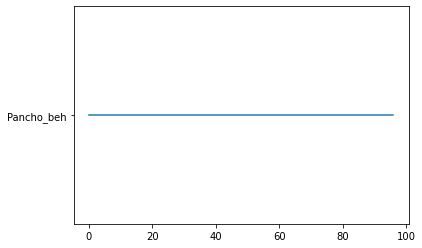

In [38]:
from pythonlib.tools.expttools import findPath
from pythonlib.tools.pandastools import applyFunctionToAllRows

# TODO: Fill this column with whether is parse"
if True:
    def F(x):
        return False
    SF = applyFunctionToAllRows(SF, F, newcolname="is_parse")


# Dataset codes - have a field <animal>_<isparse>
def F(x):
    if x["is_parse"]:
        tmp = "parse"
    else:
        tmp = "beh"        
    return f"{x['animal']}_{tmp}"
SF = applyFunctionToAllRows(SF, F, newcolname="animal_dset")


# Summarize assignment to datasets. make sure it is staircase like
plt.figure()
plt.plot(SF["animal_dset"])
print("Dataset -- Trial count")
SF["animal_dset"].value_counts()

# == filtering SF to get only same tasks
from analysis.strok import prepSF, get_SF_shared_tasks

# get common tasks.
SF_sharedtasks = get_SF_shared_tasks(SF)

# == plot example trials

# 1) Go back and reload dataset




#### TODO: go thru everything below and convert to work with current data format

In [41]:
from analysis.strok import plotTsneSeparateLabels
plotTsneSeparateLabels(SF_sharedtasks)

plotTsneSeparateLabelsHeatmap(SF, 40)

KeyError: 'Xtsne'

In [33]:
from analysis.strok import gmm_labels, gmm_extract_model
gmm_n = 14
mod = gmm_extract_model(SAVEDAT, gmm_n)
labels_gmm, SF = gmm_labels(SAVEDAT, gmm_n, SF)


SF = gmm_labels_resort(SF)

# == plot
import seaborn as sns
# plt.figure(figsize=(15,5))
fig = sns.displot(data=SF, x="label_resorted",hue="animal_dset", stat="probability", multiple="dodge", 
                  element="bars", shrink=1, aspect=3, height=5)
fig.axes[0][0].set_xticks(range(len(diffs)))
fig.axes[0][0].set_xticklabels([d[0] for d in diffs])
# sns.histplot(data=SF, x="label", hue="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1.5)
fig = sns.displot(data=SF, x="label_resorted", row="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1, aspect=3, height=5)

# == plot example trials
ploStrokOrderedByLabel(SF["label"].values, SF, [d[0] for d in diffs])


# one separate plot for each dataset, but coloring by label.
for dset in sorted(list(set(labels_dset))):
    inds = labels_dset == dset
    Xthis = Xtsne[inds]
    labels_this = labels_gmm[inds]
    fig, ax = plotScatterOverlay(Xthis, labels_this, ver="overlay", alpha=1)
    # fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")
    fig.suptitle(dset)

# def plotHistOfLabels(labels):
#     """ Plot historgram of labels,
#     INPUT:
#     - labels, vector of labels, could be string or num, 
#     """

#     # get counts for each label
#     from pythonlib.tools.listtools import tabulate_list
#     tab = tabulate_list(labels, return_as_list=True)
    
#     # sort
#     tab = sorted(tab, key=lambda x:x[0])
    
#     # plot
#     x = [t[0] for t in tab]
#     y = [t[1] for t in tab]
#     plt.figure()
#     plt.bar(x, y)
    
    
    
    
# plotHistOfLabels(labels_gmm)


plotHistDatasets(SF)

# === plot example trials, ordered by labels.
from analysis.strok import *

plotStrokOrderedByLabel(SF["label"].values, SF)

SF["monkey_train_or_test"]

#### PULL OUT SEPARATE DATASETS TO LOOK AT CHANGE OVER TIME

animal_dset = "Red_beh"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1', 'arc2-1', 'figures9']
expt_epochs_to_keep = ['lines5-2', 'lines5-1']
train_test = "test"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1']

# 1) pull out this dataset
inds = (SF["animal_dset"]==animal_dset) & (SF["expt-epoch"].isin(expt_epochs_to_keep)) & (SF["monkey_train_or_test"]==train_test)
SFthis = SF[inds]

# 2) equalize trials across expt-epochs
# expt_epoch_list = list(set(SFthis["expt-epoch"]))
# SFthis = get_SF_shared_tasks(SFthis, col_to_equalize_over="expt-epoch")

labels=SFthis["expt-epoch"].values
plotTsneSeparateLabels(SFthis, SAVEDAT, labels)


plotHistDatasets(SFthis, "label", sort_by="expt-epoch", shrink=0.5)

NameError: name 'SF_sharedtasks' is not defined

In [29]:
# 1) modify the below to take in current diectory structuer (old plots wrapper)    
plots(SDIR, overwrite=True, gmm_n=14, plotGrid=True)

** Plotting this dir: /data2/analyses/database/clustering/bysimilarity/indiv/rescale_stretch_to_1-dist_euclidian_diffs-strokes_beh_splines/Pancho-210403_180027
{'animallist': ['Pancho'], 'exptlist': ['arc2', 'figures9', 'lines5', 'shapes3', 'shapes3v2'], 'params': {'rescale_strokes_ver': 'stretch_to_1', 'distancever': 'euclidian_diffs'}}
dict_keys(['animallist', 'exptlist', 'params'])


KeyError: 'tsne_models'

In [32]:
from analysis.strok import plotHistDatasets
labels=SFthis["expt-epoch"].values
plotTsneSeparateLabels(SFthis, SAVEDAT, labels)


NameError: name 'SFthis' is not defined

In [30]:
plotHistDatasets(SF)

ValueError: Could not interpret value `label` for parameter `x`

In [31]:
SF.keys()

Index(['stroknum', 'strok', 'row_in_Dataset', 'trial_end_method',
       'online_abort', 'task_stagecategory', 'origin', 'donepos',
       'motortiming', 'motorevents', 'holdtime', 'delaytime',
       'unique_task_name', 'datetime', 'supervision_params', 'abort_params',
       'animal', 'beh_multiplier', 'bias_multiplier', 'binary_evaluation',
       'block', 'date', 'dist_total', 'frac_overlap', 'frac_touched',
       'ft_decim', 'ft_minobj', 'hausdorff', 'keepforsummary', 'posterior',
       'random_task', 'rew_total', 'score_final', 'session', 'shortness',
       'taskgroup', 'traintest', 'trial', 'trialcode', 'which_metadat_idx',
       'expt', 'monkey_train_or_test', 'tvalfake', 'tvalday', 'epoch',
       'aborted', 'character', 'insummarydates', 'idx_metadat', 'strokes_ver',
       'numstrokes', 'distance'],
      dtype='object')

# TO DO - plotting

1. better auto model selection
2. plot more rows for heat map, pca [DONE]
3. shuffle analysis for the "control for stimulus" version of category labels.
4. for each category, how confident are the assignemnets?
5. 

## TAKIGN STOCK - clustering

Best representation:
1. metric: hausdorff (mean,mean, this is crucial to make the distrubtiions gaussian-like. if use max, then will not be.
2. use similarity, scaled bwteen range 0 to 1.

Note, it is possible that will be able to fit with GMM, seems to have clusters,
especialyl when include more variation in primitives.

But clearly is different for testing for the same tasks, across epochs, and clearly falls into more longer/curvy vs. short/straight

Should improve the embeddings, perhaps include also hand-crafted componetns, like length, curvature, etc.

Distance metric:
- Consider also allowing for some variation, kind of like procrustes score. 
Or use splines?

GMM notes:
- diagonal covariance with much works cross val score (ll and bic). comapred to full.

What learn from this:
1. Structure of variation across strokes in repertoire
2. Difference in this structure based on learning (and animal)
3. Non-uniform distribution - evidence for compression. Test this by comparing to null distribution.
4. Growth in primitives over learning (strongest evidence, consider same tasks shown througout lifetime
5. Different primitives 

To do:
1. Construct global embedding, using all models that will be considered: (animals) (task/ground truth) (nn) 
2. Then plot each expt in this space. (e.g., show that animals more clustered than 
3. Include more expriments, inculding more vairation in primtiives (e..g, curves, arcs, etc)
4. Fit GMM within each expt, since part of this could be drift over time. Think of this as: first get some embedding that is global, then do clustering in that space (ie space of PCA of features)
5. GMM tends to split. Somehow constrain to combine more? maybe dont use full covariance?

-- NOTES ON SIMILARITY MATRIX

Longer strokes will tend to be more different from others, even those that are long, perhaps this is fine, 
since in the end this is the "signature" of the stroke

Normalizing to a global max distance. This makes sense, since let's  say a stroke is different from all others, then dont want to help it out by normalizing.

NOTE:
An issue is that long lines can be penalized. How to deal with this? convert to spline?


Technical:
More compact extraction of stroks, compatible easily with probedat, e..g, code to flatten that?
Why min stroke length filter not working?


Other thoughts;
### TO DO:

1) add columns for length, angle, and circularity?

2) Still issue, hausdorff is a bit brittle, if stroke are a bit shifted, etc. Change to either: splines, that distance that allows affine transformation, 

3) Note that this is probably a bigger issue for clustering than for scoring, since scoring is relative.


## Other to do:
1. filter no trials w timeout error. or other indication that I did it.



### TO DO (datset comparison using GMM?)

1. fit model using training data, see how well predict held-out training and test data.


## TAKING STOCK

TO DO:
1. come upw ith general purpose normalization for distances, so that each column is in range of around 0 to 1.
(could also apply this to the clustering code, although not needed since therye can normalize relatrive to entire dataset)


